# Homework 0

## Package & Module

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from scipy import signal
from scipy.spatial import distance

Dataset:
1. [AirBox Dataset]( https://sites.google.com/site/cclljj/dataset-airbox)
2. Use “March 2017, Taiwan” dataset ( 1 month )

In [77]:
df1 = pd.read_csv('201703_Taiwan.csv')
df1.head()

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499
1,2017-03-01,08:00:01,28C2DDDD4781,41,0,0,23.37,73,23.483,120.443
2,2017-03-01,08:00:01,74DA3895E132,52,66,35,25.50,60,22.624,120.356
3,2017-03-01,08:00:02,74DA3895C590,39,44,26,20.25,79,24.252,120.739
4,2017-03-01,08:00:02,74DA3895C34E,42,56,30,21.12,78,24.196,120.748


### Preprocessing Tasks:


1.Discover bad data and remove/fix it.
 - Remove the anomal records.(Ex: value of PM2.5 is 0) 

In [78]:
print('Before removing anomal records :',len(df1.index))

df2 = df1[df1['PM2.5'] > 0]
print('After removing PM2.5 <=0 :',len(df2.index))

df3 = df2[df2['PM10'] > 0]
print('After removing PM10 <=0 :',len(df3.index))

df4 = df3[df3['PM1'] > 0]
print('After removing PM1 <=0 :',len(df4.index))

print('Total remove anomal records:',len(df1.index) - len(df4.index))

Before removing anomal records : 4191423
After removing PM2.5 <=0 : 4154314
After removing PM10 <=0 : 3347113
After removing PM1 <=0 : 3341221
Total remove anomal records: 850202


- Remove the sensors with few data(less than 1000)

In [79]:
df_device_count = df4['device_id'].value_counts().reset_index()
df_device_count.columns = ['device_id', 'counts']
df_device_count

,device_id,counts
0,74DA3895E0A4,4417
1,74DA3895E04C,4409
2,74DA3895C40A,4393
3,74DA3895E0AC,4387
4,74DA3895C2B8,4384
...,...,...
1208,74DA38B79450,1
1209,74DA38B79308,1
1210,74DA38B79480,1
1211,74DA38B7947A,1


In [80]:
df_device_count.describe()

,counts
count,1213.000000
mean,2754.510305
std,1071.062185
min,1.000000
25%,2510.000000
50%,3214.000000
75%,3348.000000
max,4417.000000


In [81]:
df5  = pd.merge(df4, df_device_count, on='device_id')
df5 

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,counts
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499,1502
1,2017-03-01,08:29:35,74DA388FF5F6,48,57,35,20.12,88,25.059,121.499,1502
2,2017-03-01,08:41:25,74DA388FF5F6,47,58,34,19.87,88,25.059,121.499,1502
3,2017-03-01,08:53:16,74DA388FF5F6,57,71,44,19.37,89,25.059,121.499,1502
4,2017-03-01,09:11:00,74DA388FF5F6,70,87,59,19.62,88,25.059,121.499,1502
...,...,...,...,...,...,...,...,...,...,...,...
3341216,2017-03-31,23:16:52,74DA38AF4912,8,9,6,15.75,83,25.078,121.374,14
3341217,2017-03-31,23:22:48,74DA38AF4912,7,8,6,15.87,82,25.078,121.374,14
3341218,2017-03-31,23:34:36,74DA38AF4912,8,8,6,15.87,82,25.078,121.374,14
3341219,2017-03-31,23:46:24,74DA38AF4912,8,10,7,16.00,82,25.078,121.374,14


In [82]:
print('Before removing the sensor data less than 1000: ',len( df5.index))
df_remove_data_less_than_1000 = df5[df5.counts>=1000]
print('After  removing the sensor data less than 1000: ',len(df_remove_data_less_than_1000.index))
df_remove_data_less_than_1000

Before removing the sensor data less than 1000:  3341221
After  removing the sensor data less than 1000:  3286800


,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,counts
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499,1502
1,2017-03-01,08:29:35,74DA388FF5F6,48,57,35,20.12,88,25.059,121.499,1502
2,2017-03-01,08:41:25,74DA388FF5F6,47,58,34,19.87,88,25.059,121.499,1502
3,2017-03-01,08:53:16,74DA388FF5F6,57,71,44,19.37,89,25.059,121.499,1502
4,2017-03-01,09:11:00,74DA388FF5F6,70,87,59,19.62,88,25.059,121.499,1502
...,...,...,...,...,...,...,...,...,...,...,...
3327894,2017-03-31,23:31:39,74DA38B79410,86,104,55,12.50,69,35.975,126.716,1078
3327895,2017-03-31,23:37:35,74DA38B79410,93,113,58,12.50,70,35.975,126.716,1078
3327896,2017-03-31,23:43:34,74DA38B79410,89,110,57,12.50,70,35.975,126.716,1078
3327897,2017-03-31,23:49:30,74DA38B79410,84,101,54,12.50,70,35.975,126.716,1078


- Remove the sensors with long time gap (less than 15 days)

In [83]:
df_time = df_remove_data_less_than_1000[['Date','device_id']] 
df_time

,Date,device_id
0,2017-03-01,74DA388FF5F6
1,2017-03-01,74DA388FF5F6
2,2017-03-01,74DA388FF5F6
3,2017-03-01,74DA388FF5F6
4,2017-03-01,74DA388FF5F6
...,...,...
3327894,2017-03-31,74DA38B79410
3327895,2017-03-31,74DA38B79410
3327896,2017-03-31,74DA38B79410
3327897,2017-03-31,74DA38B79410


In [84]:
df_day = df_time.drop_duplicates()# remove same day different time
df_day_count = df_day['device_id'].value_counts().reset_index()
df_day_count.columns = ['device_id', 'day_counts']
df_day_count

,device_id,day_counts
0,74DA3895E044,31
1,74DA3895E016,31
2,74DA3895C32E,31
3,74DA3895DDE0,31
4,74DA3895C350,31
...,...,...
1068,74DA3895E1AA,9
1069,74DA3895C410,8
1070,74DA3895C2E4,6
1071,74DA3895C304,6


In [85]:
df6  = pd.merge(df_remove_data_less_than_1000 , df_day_count, on='device_id')
df6 

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,counts,day_counts
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499,1502,20
1,2017-03-01,08:29:35,74DA388FF5F6,48,57,35,20.12,88,25.059,121.499,1502,20
2,2017-03-01,08:41:25,74DA388FF5F6,47,58,34,19.87,88,25.059,121.499,1502,20
3,2017-03-01,08:53:16,74DA388FF5F6,57,71,44,19.37,89,25.059,121.499,1502,20
4,2017-03-01,09:11:00,74DA388FF5F6,70,87,59,19.62,88,25.059,121.499,1502,20
...,...,...,...,...,...,...,...,...,...,...,...,...
3286795,2017-03-31,23:31:39,74DA38B79410,86,104,55,12.50,69,35.975,126.716,1078,9
3286796,2017-03-31,23:37:35,74DA38B79410,93,113,58,12.50,70,35.975,126.716,1078,9
3286797,2017-03-31,23:43:34,74DA38B79410,89,110,57,12.50,70,35.975,126.716,1078,9
3286798,2017-03-31,23:49:30,74DA38B79410,84,101,54,12.50,70,35.975,126.716,1078,9


In [86]:
print('Before removing the sensor data less than 15 days in a month: ',len( df6.index))
df_day_remove_data_less_than_15 = df6[df6.day_counts>=15]
print('After  removing the sensor data less than 15 days in a month: ',len(df_day_remove_data_less_than_15.index))
df_day_remove_data_less_than_15

Before removing the sensor data less than 15 days in a month:  3286800
After  removing the sensor data less than 15 days in a month:  3232994


,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,counts,day_counts
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499,1502,20
1,2017-03-01,08:29:35,74DA388FF5F6,48,57,35,20.12,88,25.059,121.499,1502,20
2,2017-03-01,08:41:25,74DA388FF5F6,47,58,34,19.87,88,25.059,121.499,1502,20
3,2017-03-01,08:53:16,74DA388FF5F6,57,71,44,19.37,89,25.059,121.499,1502,20
4,2017-03-01,09:11:00,74DA388FF5F6,70,87,59,19.62,88,25.059,121.499,1502,20
...,...,...,...,...,...,...,...,...,...,...,...,...
3264754,2017-03-31,23:32:27,74DA3895E0AE,4,5,3,22.25,67,23.879,120.362,1878,15
3264755,2017-03-31,23:38:21,74DA3895E0AE,3,3,2,22.25,67,23.879,120.362,1878,15
3264756,2017-03-31,23:44:16,74DA3895E0AE,2,3,2,22.12,66,23.879,120.362,1878,15
3264757,2017-03-31,23:50:10,74DA3895E0AE,3,3,2,22.12,66,23.879,120.362,1878,15


#### 2. Data alignment
- We require aligned-time data for future works. 
    - However, the sensors don’t have a  static record time. 
    - In order to solve this problem, we can use linear interplolation. (or any methods you like)
- For example, if we want to align the sample rate to 1  record every 10 minutes,we can calculate the pm2.5 value at 17:10 by using the value at 17:04 and 17:18.

In [87]:
time_df = df_day_remove_data_less_than_15.copy()
time_df['date_time'] = pd.to_datetime(time_df['Date']+' '+time_df['Time'])
time_df.head(5)

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,counts,day_counts,date_time
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499,1502,20,2017-03-01 08:00:00
1,2017-03-01,08:29:35,74DA388FF5F6,48,57,35,20.12,88,25.059,121.499,1502,20,2017-03-01 08:29:35
2,2017-03-01,08:41:25,74DA388FF5F6,47,58,34,19.87,88,25.059,121.499,1502,20,2017-03-01 08:41:25
3,2017-03-01,08:53:16,74DA388FF5F6,57,71,44,19.37,89,25.059,121.499,1502,20,2017-03-01 08:53:16
4,2017-03-01,09:11:00,74DA388FF5F6,70,87,59,19.62,88,25.059,121.499,1502,20,2017-03-01 09:11:00


In [88]:
df_for_alignment = time_df.copy()
df_for_alignment.drop(['Date', 'Time', ' lat',' lon','counts','day_counts'], axis=1, inplace=True)

# del time_combined['Date']
# del time_combined['Time']
# del time_combined[' lat']
# del time_combined[' lon']
# del time_combined['counts']
# del time_combined['day_counts']


df_for_alignment['date_time'] = pd.to_datetime(df_for_alignment['date_time'])
df_for_alignment.head(5)

,device_id,PM2.5,PM10,PM1,Temperature,Humidity,date_time
0,74DA388FF5F6,41,48,28,20.00,89,2017-03-01 08:00:00
1,74DA388FF5F6,48,57,35,20.12,88,2017-03-01 08:29:35
2,74DA388FF5F6,47,58,34,19.87,88,2017-03-01 08:41:25
3,74DA388FF5F6,57,71,44,19.37,89,2017-03-01 08:53:16
4,74DA388FF5F6,70,87,59,19.62,88,2017-03-01 09:11:00


In [89]:
#groupby, resample and interpolate
df_alignment = df_for_alignment.groupby('device_id').apply(lambda x : x.set_index('date_time')
                                            .resample('10T')
                                            .first()
                                            .interpolate()).reset_index(level=0, drop=True).reset_index()

In [90]:
df_alignment.head()

,date_time,device_id,PM2.5,PM10,PM1,Temperature,Humidity
0,2017-03-05 13:30:00,28C2DDDD3FE7,13.0,15.0,10.0,24.62,30.0
1,2017-03-05 13:40:00,28C2DDDD3FE7,13.0,14.0,10.0,24.50,30.0
2,2017-03-05 13:50:00,NaN,13.0,14.5,10.0,24.50,30.0
3,2017-03-05 14:00:00,28C2DDDD3FE7,13.0,15.0,10.0,24.50,30.0
4,2017-03-05 14:10:00,28C2DDDD3FE7,14.0,15.0,10.0,24.37,30.0


In [91]:
df_alignment = df_alignment.fillna(method='pad')
df_alignment.head()

,date_time,device_id,PM2.5,PM10,PM1,Temperature,Humidity
0,2017-03-05 13:30:00,28C2DDDD3FE7,13.0,15.0,10.0,24.62,30.0
1,2017-03-05 13:40:00,28C2DDDD3FE7,13.0,14.0,10.0,24.50,30.0
2,2017-03-05 13:50:00,28C2DDDD3FE7,13.0,14.5,10.0,24.50,30.0
3,2017-03-05 14:00:00,28C2DDDD3FE7,13.0,15.0,10.0,24.50,30.0
4,2017-03-05 14:10:00,28C2DDDD3FE7,14.0,15.0,10.0,24.37,30.0


In [92]:
geo_df = df_day_remove_data_less_than_15[['device_id',' lat', ' lon']]
geo_df = geo_df.drop_duplicates()


In [93]:
df7  = pd.merge( geo_df, df_alignment ,on='device_id')
df7.head()

,device_id,lat,lon,date_time,PM2.5,PM10,PM1,Temperature,Humidity
0,74DA388FF5F6,25.059,121.499,2017-03-01 08:00:00,41.0,48.0,28.0,20.000,89.0
1,74DA388FF5F6,25.059,121.499,2017-03-01 08:10:00,44.5,52.5,31.5,20.060,88.5
2,74DA388FF5F6,25.059,121.499,2017-03-01 08:20:00,48.0,57.0,35.0,20.120,88.0
3,74DA388FF5F6,25.059,121.499,2017-03-01 08:30:00,47.5,57.5,34.5,19.995,88.0
4,74DA388FF5F6,25.059,121.499,2017-03-01 08:40:00,47.0,58.0,34.0,19.870,88.0


In [121]:
df7.to_csv('201703_Taiwan_preprocessed.csv')

### Observation Tasks (Visualization):

#### 1. Compare different sensors in same time interval.
   - ex: Sensor 1 on 8/10 v.s. Sensor 2 on 8/10

In [96]:
df1 = pd.read_csv('201703_Taiwan_preprocess.csv', index_col=[0])
df1['Hour'] = pd.to_datetime(df1['date_time']).dt.time
df1['Date'] = pd.to_datetime(df1['date_time']).dt.date
df1.head()


,date_time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,Hour,Date
0,2017-03-05 13:30:00,28C2DDDD3FE7,13.0,15.0,10.0,24.62,30.0,35.706,139.903,13:30:00,2017-03-05
1,2017-03-05 13:40:00,28C2DDDD3FE7,13.0,14.0,10.0,24.50,30.0,35.706,139.903,13:40:00,2017-03-05
2,2017-03-05 13:50:00,28C2DDDD3FE7,13.0,14.5,10.0,24.50,30.0,35.706,139.903,13:50:00,2017-03-05
3,2017-03-05 14:00:00,28C2DDDD3FE7,13.0,15.0,10.0,24.50,30.0,35.706,139.903,14:00:00,2017-03-05
4,2017-03-05 14:10:00,28C2DDDD3FE7,14.0,15.0,10.0,24.37,30.0,35.706,139.903,14:10:00,2017-03-05


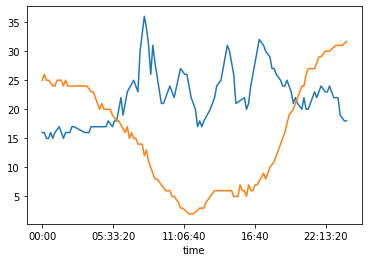

In [97]:
device1 = df1[(df1.Date.astype(str)=='2017-03-06') & (df1.device_id.astype(str)=='28C2DDDD3FE7')]
device2 = df1[(df1.Date.astype(str)=='2017-03-06') & (df1.device_id.astype(str)=='801F02000010')]


plt.plot(device1['Hour'], device1['PM2.5'],device2['Hour'], device2['PM2.5'])
plt.show()

#### 2. Plot all sensors on the map and describe the dataset

In [98]:
df_sensors = df1[['device_id',' lat',' lon']]
df_sensors_distinct = df_sensors.drop_duplicates()
df_sensors_distinct.index = range(len(df_sensors_distinct.index))

In [99]:
map_osm = folium.Map(location=[24.643341, 119.951276], zoom_start=6)
df_sensors_distinct.apply(lambda row:folium.CircleMarker(
                                             location=[row[" lat"], row[" lon"]], 
                                              radius=1, fill_color='blue')
                                             .add_to(map_osm), axis=1)

map_osm


### Query Tasks

#### 1. How many sensors are there in the dataset?

In [100]:
ans = df1['device_id'].value_counts()
print('Number of sensors:',len(ans.index))

Number of sensors: 1032


#### 2.  Which sensor recorded the highest temperature in March? 

##### What’s the temperature? 
   


In [101]:
df=df1.loc[df1['Temperature'].idxmax()]
print('Sensor id :',df['device_id'])
print('Highest temperature in March:',df['Temperature'])
df.head()


Sensor id : 74DA3895C3B2
Highest temperature in March: 52.75


date_time    2017-03-29 13:20:00
device_id           74DA3895C3B2
PM2.5                         34
PM10                          44
PM1                           24
Name: 718639, dtype: object

#### Where's the sensor?

In [102]:
geolocator = Nominatim()
lat=df[' lat']
lon=df[' lon']
location = geolocator.reverse("37.471, 127.039")
print('Latitude:',lat,' Longitude: ',lon)
print('location:',location.address)

C:\Users\Silence\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


Latitude: 24.801  Longitude:  120.972
location: 양재시민의숲역 2번출구, 강남대로, 양재동, 서초구, 서울, 06780, 대한민국


#### 3. What were the maximal PM2.5 values of each sensors on 3/5?

In [103]:
tmp1 = df1[['Date','device_id','PM2.5']]
tmp2 =  tmp1.loc[ tmp1.Date.astype(str)=='2017-03-05']


Ans = tmp2.loc[tmp2.groupby('device_id')['PM2.5'].idxmax()]
Ans.rename(columns={'PM2.5': 'maximal PM2.5'}, inplace=True)
Ans.sort_values(by=['maximal PM2.5','device_id'], ascending=[False,True], inplace=True)
Ans.index = range(len(Ans.index))

Ans.head(10)

,Date,device_id,maximal PM2.5
0,2017-03-05,74DA388FF3D0,698.0
1,2017-03-05,74DA3895C3D6,538.0
2,2017-03-05,74DA38AF48D8,517.0
3,2017-03-05,74DA388FF3BA,443.0
4,2017-03-05,74DA3895C4C0,253.0
5,2017-03-05,74DA38A8691E,237.0
6,2017-03-05,74DA3895C2C6,236.0
7,2017-03-05,74DA3895E01A,236.0
8,2017-03-05,28C2DDDD436E,233.0
9,2017-03-05,74DA3895E100,227.0


### Time Series Data Comparsion Tasks

Choose two sensors to do the following steps.
- Q: Sequence from Sensor 1
- C: Sequence from Sensor 2
  - Distance(Q, C): Distance between Q  &  C
  - Calculate Distance(Q, C) at each step, and compare the difference between original data and transformed data

In [104]:
df_Time_Series = df1.copy()
df_Time_Series.head()

,date_time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,Hour,Date
0,2017-03-05 13:30:00,28C2DDDD3FE7,13.0,15.0,10.0,24.62,30.0,35.706,139.903,13:30:00,2017-03-05
1,2017-03-05 13:40:00,28C2DDDD3FE7,13.0,14.0,10.0,24.50,30.0,35.706,139.903,13:40:00,2017-03-05
2,2017-03-05 13:50:00,28C2DDDD3FE7,13.0,14.5,10.0,24.50,30.0,35.706,139.903,13:50:00,2017-03-05
3,2017-03-05 14:00:00,28C2DDDD3FE7,13.0,15.0,10.0,24.50,30.0,35.706,139.903,14:00:00,2017-03-05
4,2017-03-05 14:10:00,28C2DDDD3FE7,14.0,15.0,10.0,24.37,30.0,35.706,139.903,14:10:00,2017-03-05


Q : data of Sensor 1 (device_id = 74DA388FF552) on 2017/03/15

In [105]:
# Sensor1 (device_id = 74DA388FF552) 
Sensor1_df = df_Time_Series[(df_Time_Series['device_id'] == '74DA388FF552')]
Sensor1_df = Sensor1_df[(Sensor1_df['date_time'].str.startswith('2017-03-15', na=False))]
Sensor1_df = Sensor1_df.loc[:,['date_time','PM2.5']]

Sensor1_df['date_time'] = pd.to_datetime(Sensor1_df['date_time'])
Sensor1_df = Sensor1_df.set_index('date_time')
Sensor1_df.head()

,PM2.5
date_time,
2017-03-15 00:00:00,46.0
2017-03-15 00:10:00,46.5
2017-03-15 00:20:00,47.0
2017-03-15 00:30:00,44.0
2017-03-15 00:40:00,55.0


C : data of Sensor 2 (device_id = 74DA3895C4DE) on 2017/03/15

In [106]:
# Sensor2 (device_id = 74DA3895DFBE)
Sensor2_df = df_Time_Series[(df_Time_Series['device_id'] == '74DA3895C4DE')]
Sensor2_df = Sensor2_df[(Sensor2_df['date_time'].str.startswith('2017-03-15', na=False))]
Sensor2_df = Sensor2_df.loc[:,['date_time','PM2.5']]

Sensor2_df['date_time'] = pd.to_datetime(Sensor2_df['date_time'])
Sensor2_df = Sensor2_df.set_index('date_time')
Sensor2_df.head()

,PM2.5
date_time,
2017-03-15 00:00:00,30.0
2017-03-15 00:10:00,31.0
2017-03-15 00:20:00,30.0
2017-03-15 00:30:00,28.0
2017-03-15 00:40:00,28.5


1. Offset Translation:
   - Q =  Q  -  mean(Q)

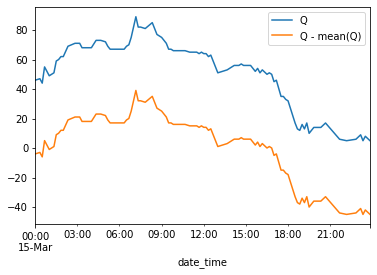

In [107]:
Q1_df = Sensor1_df.copy()
Q1_mean = Q1_df['PM2.5'].mean()
Q1_df=Q1_df.rename(columns = {"PM2.5": "Q"})   
Q1_df['Q - mean(Q)'] = Q1_df['Q'] - Q1_mean
plt.show(Q1_df.plot())

   - C  =  C  -  mean(C)

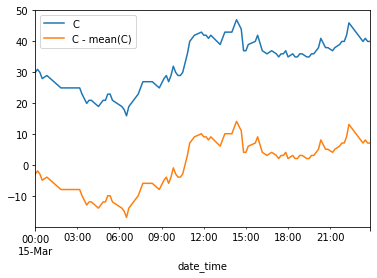

In [108]:
C1_df = Sensor2_df.copy()
C1_mean = C1_df['PM2.5'].mean()
C1_df=C1_df.rename(columns = {"PM2.5": "C"}) 
C1_df['C - mean(C)'] =C1_df['C'] - C1_mean
plt.show(C1_df.plot())

#### 2. Amplitude Scaling:
   - Q =  (Q -  mean(Q)) /  std(Q)

mean(Q): 49.94097222222222 std(Q): 24.44676692077682


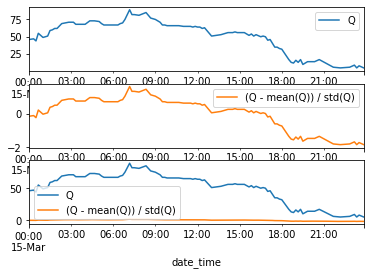

In [109]:
Q2_df = Sensor1_df.copy()
Q2_df.describe()
Q2_mean = Q2_df['PM2.5'].mean()
Q2_std = Q2_df['PM2.5'].std()
print('mean(Q):',Q2_mean,'std(Q):',Q2_std )
Q2_df.head()
Q2_df=Q2_df.rename(columns = {"PM2.5": "Q"})   
Q2_df['(Q - mean(Q)) / std(Q)'] = (Q2_df['Q'] - Q2_mean)/Q2_std

fig, axes = plt.subplots(nrows=3, ncols=1)

Q2_df['Q'].plot(ax=axes[0], legend=True)
Q2_df['(Q - mean(Q)) / std(Q)'].plot(ax=axes[1], legend=True,color='C1')
Q2_df.plot(ax=axes[2])

plt.show()

- C  =  (C -  mean(C)) /  std(C)

mean(C): 32.791666666666664 std(C): 8.107828816143574


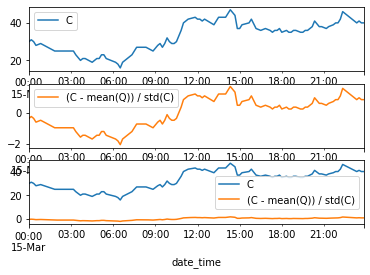

In [110]:
C2_df = Sensor2_df.copy()
C2_df.describe()
C2_mean = C2_df['PM2.5'].mean()
C2_std = C2_df['PM2.5'].std()
print('mean(C):',C2_mean,'std(C):',C2_std )
C2_df.head()
C2_df=C2_df.rename(columns = {"PM2.5": "C"})   
C2_df['(C - mean(Q)) / std(C)'] = (C2_df['C'] - C2_mean)/C2_std

fig, axes = plt.subplots(nrows=3, ncols=1)

C2_df['C'].plot(ax=axes[0], legend=True)
C2_df['(C - mean(Q)) / std(C)'].plot(ax=axes[1], legend=True,color='C1')
C2_df.plot(ax=axes[2])

plt.show()

3. Linear Trend Removal: 
    - Q =  detrend(Q)

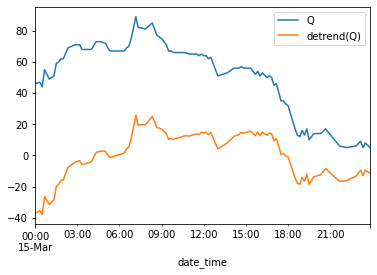

In [111]:
Q3_df = Sensor1_df.copy()
Q3_df=Q3_df.rename(columns = {"PM2.5": "Q"})   

Q3_df['detrend(Q)'] = signal.detrend(Q3_df['Q'], axis=-1, type='linear', bp=0)
plt.show(Q3_df.plot())


- C  =  detrend(C)

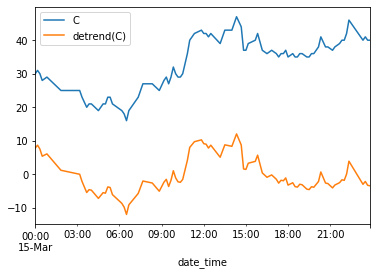

In [112]:
C3_df = Sensor2_df.copy()
C3_df = C3_df.rename(columns = {"PM2.5": "C"})   

C3_df['detrend(C)'] = signal.detrend(C3_df['C'], axis=-1, type='linear', bp=0)
plt.show(C3_df.plot())


4. Noise Removal: Q =  smooth(Q), C  =  smooth(C)

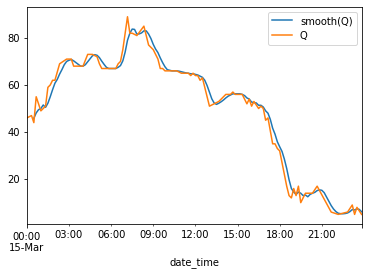

In [113]:
Q4_df = Sensor1_df.copy()
Q4_df = Q4_df.rename(columns = {"PM2.5": "Q"})   

Q4_df_Noise_Removal  = Sensor1_df.copy()

Q4_df_Noise_Removal = Q4_df_Noise_Removal.rolling(4).mean()

Q4_df_Noise_Removal = Q4_df_Noise_Removal.rename(columns = {"PM2.5": "smooth(Q)"})   


ax = Q4_df_Noise_Removal.plot()
Q4_df.plot(ax=ax)


plt.show()


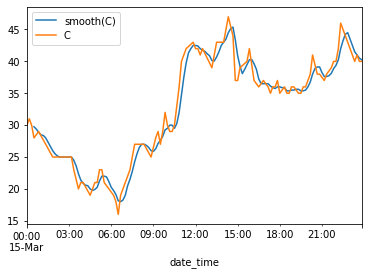

In [114]:
C4_df = Sensor2_df.copy()
C4_df = C4_df.rename(columns = {"PM2.5": "C"})   

C4_df_Noise_Removal  = Sensor2_df.copy()

C4_df_Noise_Removal = C4_df_Noise_Removal.rolling(4).mean()

C4_df_Noise_Removal = C4_df_Noise_Removal.rename(columns = {"PM2.5": "smooth(C)"})   


ax = C4_df_Noise_Removal.plot()
C4_df.plot(ax=ax)


plt.show()


#### Offset Translation Distance(Q, C)


In [115]:
Q5_OF_df = Q1_df.copy()
del Q5_OF_df['Q']

C5_OF_df = C1_df.copy()
del C5_OF_df['C']

dst_OT = distance.euclidean(Q5_OF_df,C5_OF_df)
print('Offset Translation Distance(Q, C):',dst_OT)

Offset Translation Distance(Q, C): 358.7030820074824


#### Amplitude Scaling Distance(Q, C)


In [116]:

Q5_AS_df = Q2_df.copy()
del Q5_AS_df['Q']

C5_AS_df = C2_df.copy()
del C5_AS_df['C']

dst_AS = distance.euclidean(Q5_AS_df,C5_AS_df)
print('Amplitude Scaling Distance(Q, C): ',dst_AS)

Amplitude Scaling Distance(Q, C):  21.366986425712447


#### Linear Trend Removal Distance(Q, C)


In [117]:

Q5_LTR_df = Q3_df.copy()
del Q5_LTR_df['Q']

C5_LTR_df = C3_df.copy()
del C5_LTR_df['C']

dst_LTR = distance.euclidean(Q5_LTR_df,C5_LTR_df)
print('Linear Trend Removal Distance(Q, C): ',dst_LTR)

Linear Trend Removal Distance(Q, C):  185.6047725670069


#### Noise Removal Distance(Q, C)


In [118]:

Q5_NR_df = Q4_df_Noise_Removal.copy()

C5_NR_df = C4_df_Noise_Removal.copy()

Q5_NR_df.dropna(inplace=True)
C5_NR_df.dropna(inplace=True)


dst_NR = distance.euclidean(Q5_NR_df,C5_NR_df)
print(' Noise Removal Distance(Q, C): ',dst_NR)

 Noise Removal Distance(Q, C):  409.9195191165917


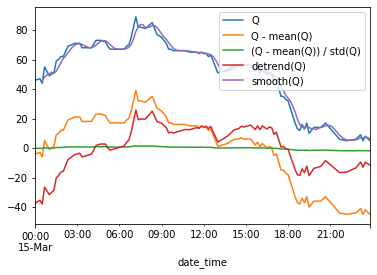

In [119]:
ax = Q1_df.plot()
Q2_df['(Q - mean(Q)) / std(Q)'].plot(ax =ax,legend=True)
Q3_df['detrend(Q)'].plot(ax =ax,legend=True)
Q4_df_Noise_Removal.plot(ax =ax)


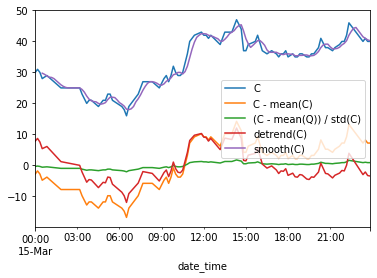

In [120]:
ax = C1_df.plot()
C2_df['(C - mean(Q)) / std(C)'].plot(ax =ax,legend=True)
C3_df['detrend(C)'].plot(ax =ax,legend=True)
C4_df_Noise_Removal.plot(ax =ax)

